# Basics of logistic regression

## Import the relevant libraries

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

## Load the data

In [7]:
raw_data = pd.read_csv("2.01. Admittance.csv")
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [10]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1 ,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [11]:
y = data['Admitted']
x = data['SAT']

## Let's plot the data

### Scatter plot

Text(0, 0.5, 'Admitted')

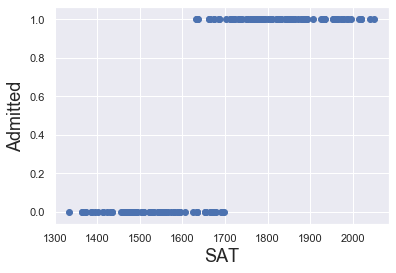

In [14]:
plt.scatter(x,y)
plt.xlabel('SAT',size =18)
plt.ylabel('Admitted',size =18)

### Plot with a regression line

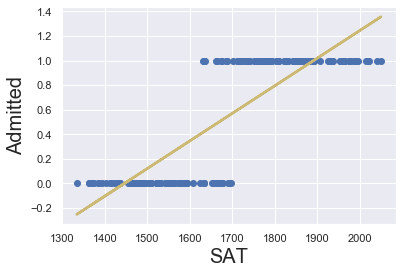

In [17]:
x1 = sm.add_constant(x)
reg_lin = sm.OLS(y,x1)
results_lin = reg_lin.fit()

plt.scatter(x,y,color = 'C0')
y_hat = x*results_lin.params[1]+results_lin.params[0]

plt.plot(x,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


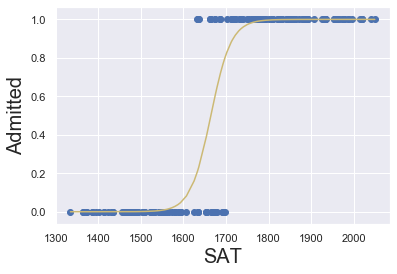

In [20]:
reg_log = sm.Logit(y,x1)
results_log = reg_log.fit()

def f(x1,b0,b1):
    return np.array(np.exp(b0+x1*b1) / (1 + np.exp(b0+x1*b1)))

f_sorted = np.sort(f(x,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x))

plt.scatter(x,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()